# HOMEWORK 1
Doudou Zhang

Question1

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [3]:
print(df.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [4]:
import numpy as np
print('IRIS data set\'s shape is:', df.shape)
print('IRIS data set\'s ndim is:', df.ndim)
print('IRIS data set\'s size is:', df.size)
print('IRIS data set\'s data type is:', type(df))
print('IRIS data set\'s len() is:', len(df))

IRIS data set's shape is: (150, 5)
IRIS data set's ndim is: 2
IRIS data set's size is: 750
IRIS data set's data type is: <class 'pandas.core.frame.DataFrame'>
IRIS data set's len() is: 150


Question2

In [5]:
print(type(df))
y = df.iloc[0:100, 4].values
print(type(y))

#print(y)
#print(len(y))
y = np.where(y=='Iris-setosa',-1,1) # set setosa to -1 and versicolor to 1
#print(y)

#####################################
X = df.iloc[0:100,[1,3]].values    
#####################################

print(type(X))



<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
Question3

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:50,0], X[:50,1],
           color='red',marker='o', label='setosa')

plt.scatter(X[50:100,0], X[50:100,1],
           color='blue',marker='x', label='versicolor')

plt.xlabel('setal Width')
plt.ylabel('petal Width')

plt.legend(loc='upper left')

My Answer to Q3: Yes, according to the plot above, it's linear seperable and will coverge.

In [ ]:
Question4

In [7]:
class Perceptron(object): # building the template
        """ Perceptron classifier
        Params: eta (learning rate); n_iter (epochs)
        Attribs: w_: 1D-array; errors_ nos of misclassifications
        """
        def __init__(self, eta=0.01, n_iter=10):
            self.eta = eta
            self.n_iter = n_iter
        
        def fit(self, X, y):
            """ Fit training data
            Params: X (m_samples, k_features); y: target value (m_samples)
            Returns: self object
            """
            self.w_ = np.zeros(1+X.shape[1]) # nos of features in X plus one for "bias"
            self.errors_ = [] 
            
            for k in range(self.n_iter):
                errors = 0
                for xi, target in zip(X,y):
                    update = self.eta * (target - self.predict(xi))
                    self.w_[1:] += update * xi
                    self.w_[0]  += update
                    errors      += int(update != 0.0) 
                self.errors_.append(errors)
            return self
        
        def net_input(self, X):
            """ Calculate net input -- z"""
            return np.dot(X, self.w_[1:])+ self.w_[0]
        
        def predict(self, X):
            """ Returns class albel after unit step"""
            return np.where(self.net_input(X)>=0.0, 1, -1)
    

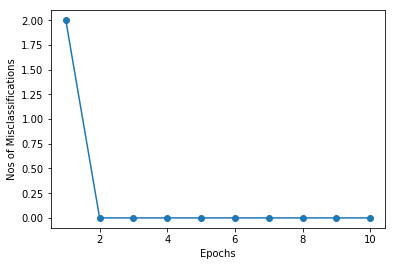

In [8]:
ppn = Perceptron(eta=0.1, n_iter=10) # step 1: instantiate 
ppn.fit(X,y)                         # step 2: "fit" 
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Nos of Misclassifications')
plt.show()


In [ ]:
My answer to Question4: it takes 2 epochs to coverge. 

In [ ]:
Question5

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


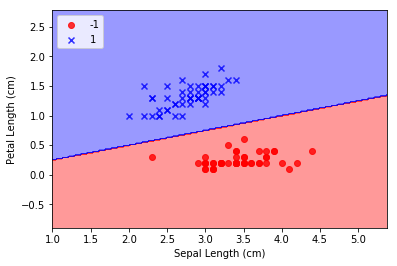

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    # setup marker generator and color map
    markers = ('o','x')#,'s','^','v')
    colors  = ('red','blue')#,'lightgreen','gray','cyan')
    cmap    = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y == cl, 1], alpha = 0.8, c=cmap(idx), marker = markers[idx], label=cl)

        
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
Question6

In [10]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta     = eta
        self.n_iter  = n_iter
    
    def fit(self, X, y):
        self.w_    = np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            yhat         = self.net_input(X)
            errors       = (y-yhat)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()
            cost         = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
#     def activation(self, X):
#         return self.net_input(X)
    
#     def predict(self, X):
#         return np.where(self.activation(X) >= 0.0, 1, -1)

Text(0.5, 1.0, 'Adaline - Learning rate 0.00001')

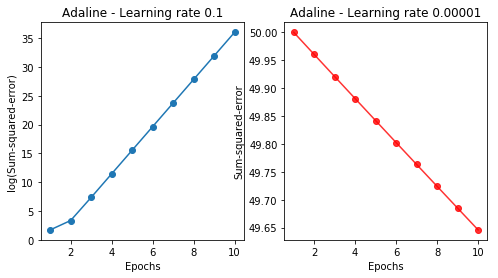

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ada1 = AdalineGD(n_iter=10, eta=  0.1).fit(X,y)
ada2 = AdalineGD(n_iter=10, eta=0.00001).fit(X,y)

ax[0].plot(range(1,len(ada1.cost_)+1), 
          np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_, marker='o',color = 'r', alpha=0.8)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.00001')



In [ ]:
My answer to Question6: The model with learning rate of eta=0.1 diverges, while the model with eta=0.00001 converges.

In [ ]:
Question7

In [12]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [13]:
from numpy.random import seed

class AdalineSGD(object): # Adaline Stochastic Gradient Descent
    ''' ADAptive LInear Neuron classifier
    Param: eta: float ("learning rate")    n_iter: int ("passes over training data")) 
    Attributes: w_ : 1d-array ("weights after fitting")
                errors_ : list ("nos of misclassifiation in every epoch")
                shuffle : bool (default:True) ("shuffles training data every epoch")
                random_state: int (default:Non) ("set randome state for shuffling and initializing weights")
    '''
    def __init__(self, eta=0.01, n_iter=10,
                shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
    
    def fit(self, X, y):
        ''' Fit training data 
        Param: X (nxk, n-samples, k-features)         y: dependent variable / target / response (nx1)
        Returns: self: object '''
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X,y): # zipped up by rows or observations
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        ''' Fit training data without reinitializing the weights'''
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1: # if y has more than one element
            for xi, target in zip(X,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        return self

    def _shuffle(self, X, y):
        ''' Shuffle training data'''
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        ''' Initialize weights to zeros '''
        self.w_ = np.zeros(1+m)
        self.w_initalized = True
        
    def _update_weights(self, xi, target):
        ''' Apply Adaline learning rule to update the weights '''
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0]  += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self,X):
        ''' Calculate net input '''
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        ''' Return class label after unit step '''
        return np.where(self.activation(X) >=0.0, 1, -1)
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


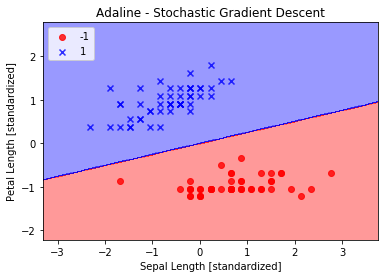

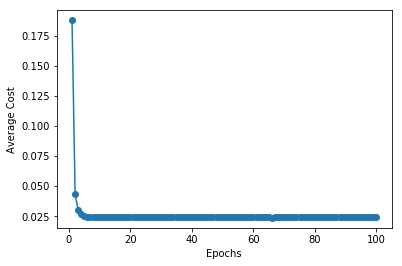

In [14]:
ada = AdalineSGD(n_iter=100, eta=0.01, random_state=1)  

ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Sepal Length [standardized]')
plt.ylabel('Petal Length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1,len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

In [ ]:
My answer to Q7: Yes, it does converge. 

In [ ]:
Question8

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Perceptron  does not have it.
LogisticRegression  has predict_proba attribute
Linear SVM  has predict_proba attribute
Decision Tree  has predict_proba attribute
Random Forest  has predict_proba attribute
AdaBoost  has predict_proba attribute
RBF SVM  has predict_proba attribute


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Net  has predict_proba attribute
Naive Bayes  has predict_proba attribute
Nearest Neighbors  has predict_proba attribute


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Perceptron  does not have it.
LogisticRegression  has predict_proba attribute
Linear SVM  has predict_proba attribute
Decision Tree  has predict_proba attribute
Random Forest  has predict_proba attribute
AdaBoost  has predict_proba attribute
RBF SVM  has predict_proba attribute


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Net  has predict_proba attribute
Naive Bayes  has predict_proba attribute
Nearest Neighbors  has predict_proba attribute


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Perceptron  does not have it.
LogisticRegression  has predict_proba attribute
Linear SVM  has predict_proba attribute
Decision Tree  has predict_proba attribute
Random Forest  has predict_proba attribute
AdaBoost  has predict_proba attribute
RBF SVM  has predict_proba attribute


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Net  has predict_proba attribute
Naive Bayes  has predict_proba attribute
Nearest Neighbors  has predict_proba attribute
Perceptron  does not have it.


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression  has predict_proba attribute
Linear SVM  has predict_proba attribute
Decision Tree  has predict_proba attribute
Random Forest  has predict_proba attribute
AdaBoost  has predict_proba attribute
RBF SVM  has predict_proba attribute


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Net  has predict_proba attribute
Naive Bayes  has predict_proba attribute
Nearest Neighbors  has predict_proba attribute


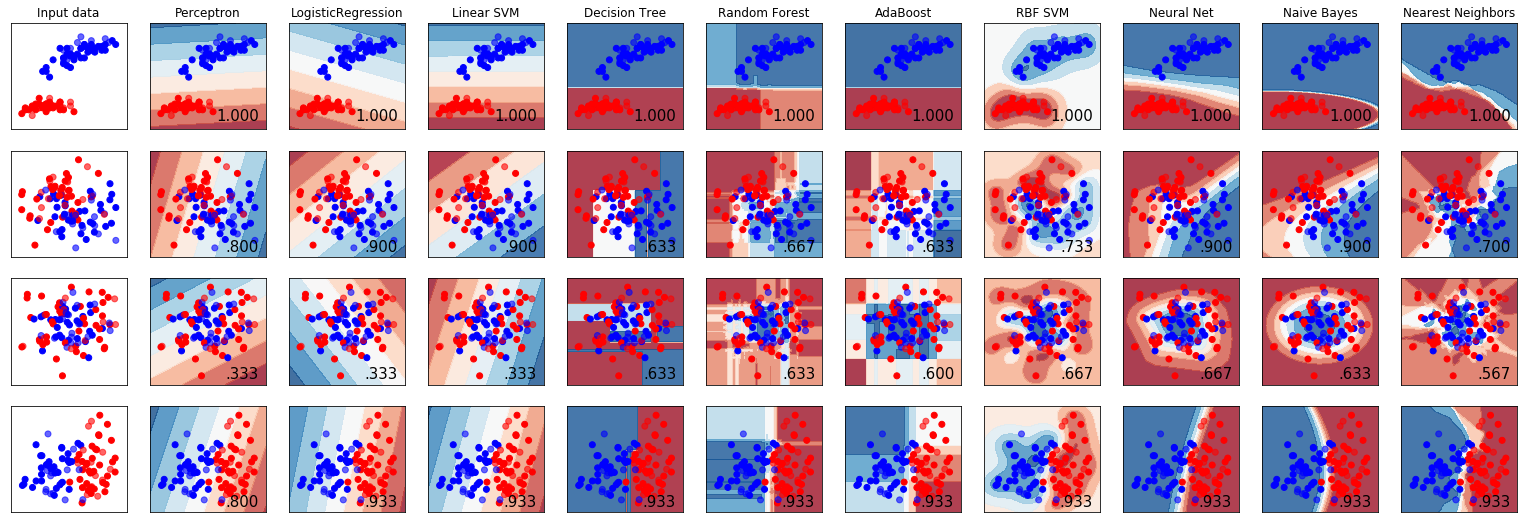

In [15]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


h = .02  # step size in the mesh

names = ["Perceptron",
         "LogisticRegression",
         "Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         "AdaBoost",
         "RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors"] 

classifiers = [
    Perceptron(),
    LogisticRegression(),
    SVC(kernel="linear", C=1, probability = True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    AdaBoostClassifier(),
    SVC(gamma=2, C=1, probability = True),
    MLPClassifier(hidden_layer_sizes=(100,50), alpha=1),
    GaussianNB(),
    KNeighborsClassifier(5)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa',-1,1) # set setosa to -1 and versicolor to 1
X = df.iloc[0:100,[0,2]].values      
iris = (X,y)

datasets = [iris, make_moons(noise=0.3*2, random_state=0),
            make_circles(noise=0.2*2, factor=0.5, random_state=1),
            linearly_separable]         

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        if hasattr(clf, "predict_proba"):
            print(name,' has predict_proba attribute')
        else:
            print(name,' does not have it.')
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

